In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#! /usr/bin/env python
from geopandas import GeoDataFrame
import pandas as pd
import matplotlib.pyplot as plt
from vayu import interpolPlot

In [3]:
"""data files
shape files:
https://www2.census.gov/geo/tiger/TIGER2017/STATE/

data files:
https://aqs.epa.gov/aqsweb/airdata/daily_44201_2019.zip
https://openaq.org/#/countries/IN?_k=j7c7ka
"""
shapeFile = "../re/tl_2017_us_state.shp"
datafile = "../re/daily_44201_2018.csv"
long = "Longitude"
lat = "Latitude"
pollutant = "Arithmetic Mean"
df = pd.read_csv(datafile)
shape_df = GeoDataFrame.from_file(shapeFile)
shape_df.drop(shape_df.index[[34, 35, 36, 40, 41, 49, 31]], 
              inplace=True)

/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
No handles with labels found to put in legend.


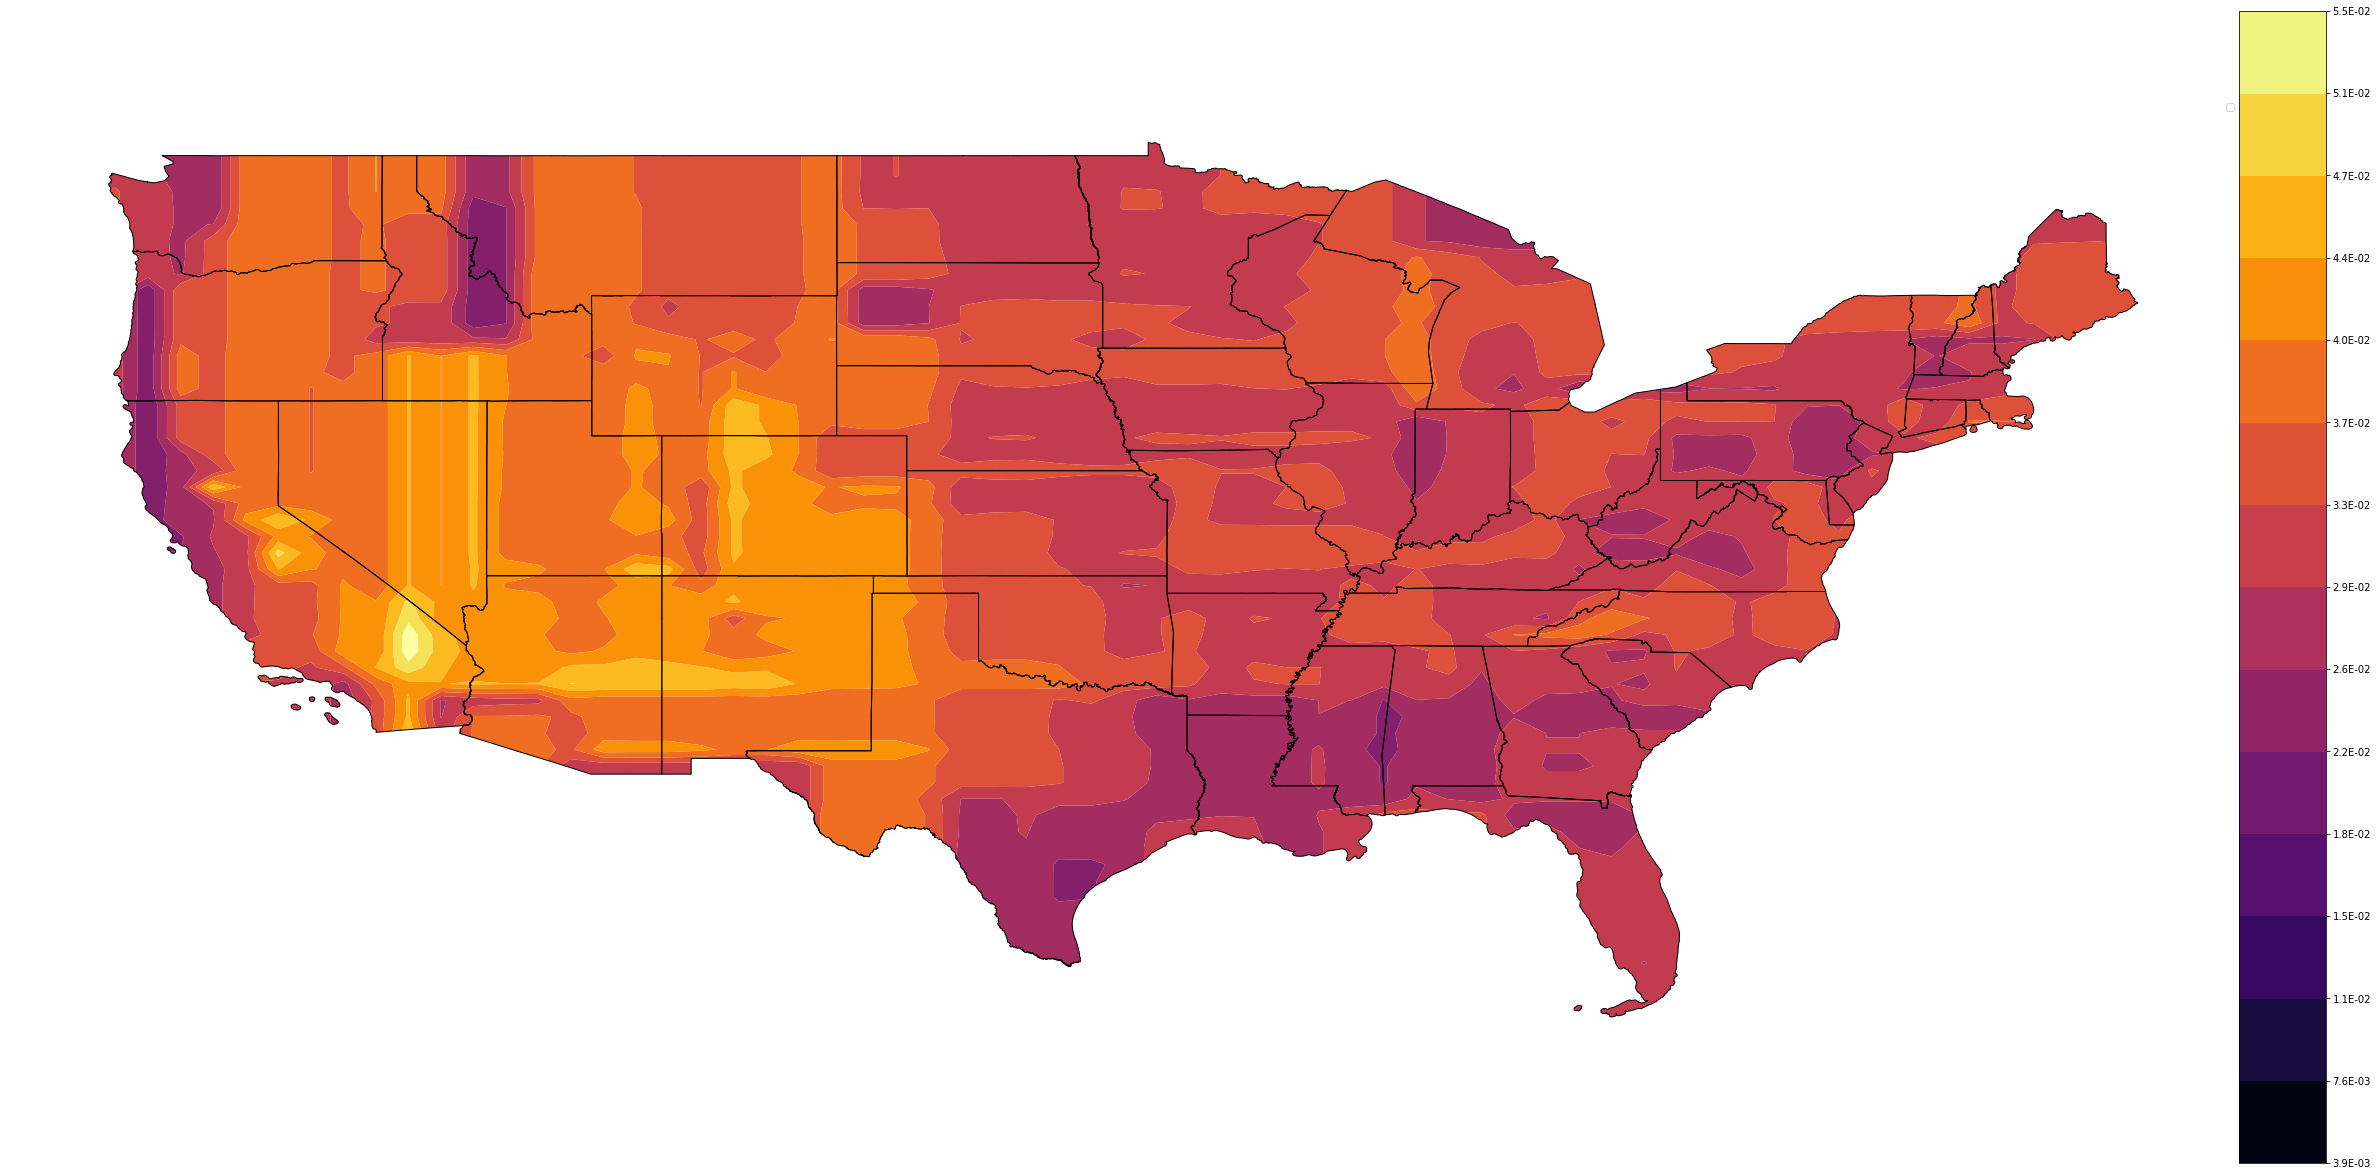

In [4]:
interpolPlot(df, shape_df, long, lat, pollutant)
plt.savefig("interpolPlot1.png")
plt.show()

Focusing on Califonria.

In [5]:
shape_df = shape_df[13:14]

We don't support `LinearSegmentedColormap` pass a `ListedColormap`. We will be demoing below how to convert from former to latter.

In [6]:
interpolPlot(df, shape_df, long, lat, pollutant, cmap='Greens')
plt.show()

/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: We only support ListedColormap right now.
simply convert your cmap to ListedColormap using url here.https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html#sphx-glr-tutorials-colors-colormap-manipulation-py

In [7]:
# Converting to ListedColormap

import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

N = 258
cmap_colors = cm.get_cmap('Greens', N)
newcolors = (cmap_colors(np.linspace(0, 1, N))[:, :3]).tolist()
listedcmap = ListedColormap(newcolors, name='GreensListed', N=N)

/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
No handles with labels found to put in legend.


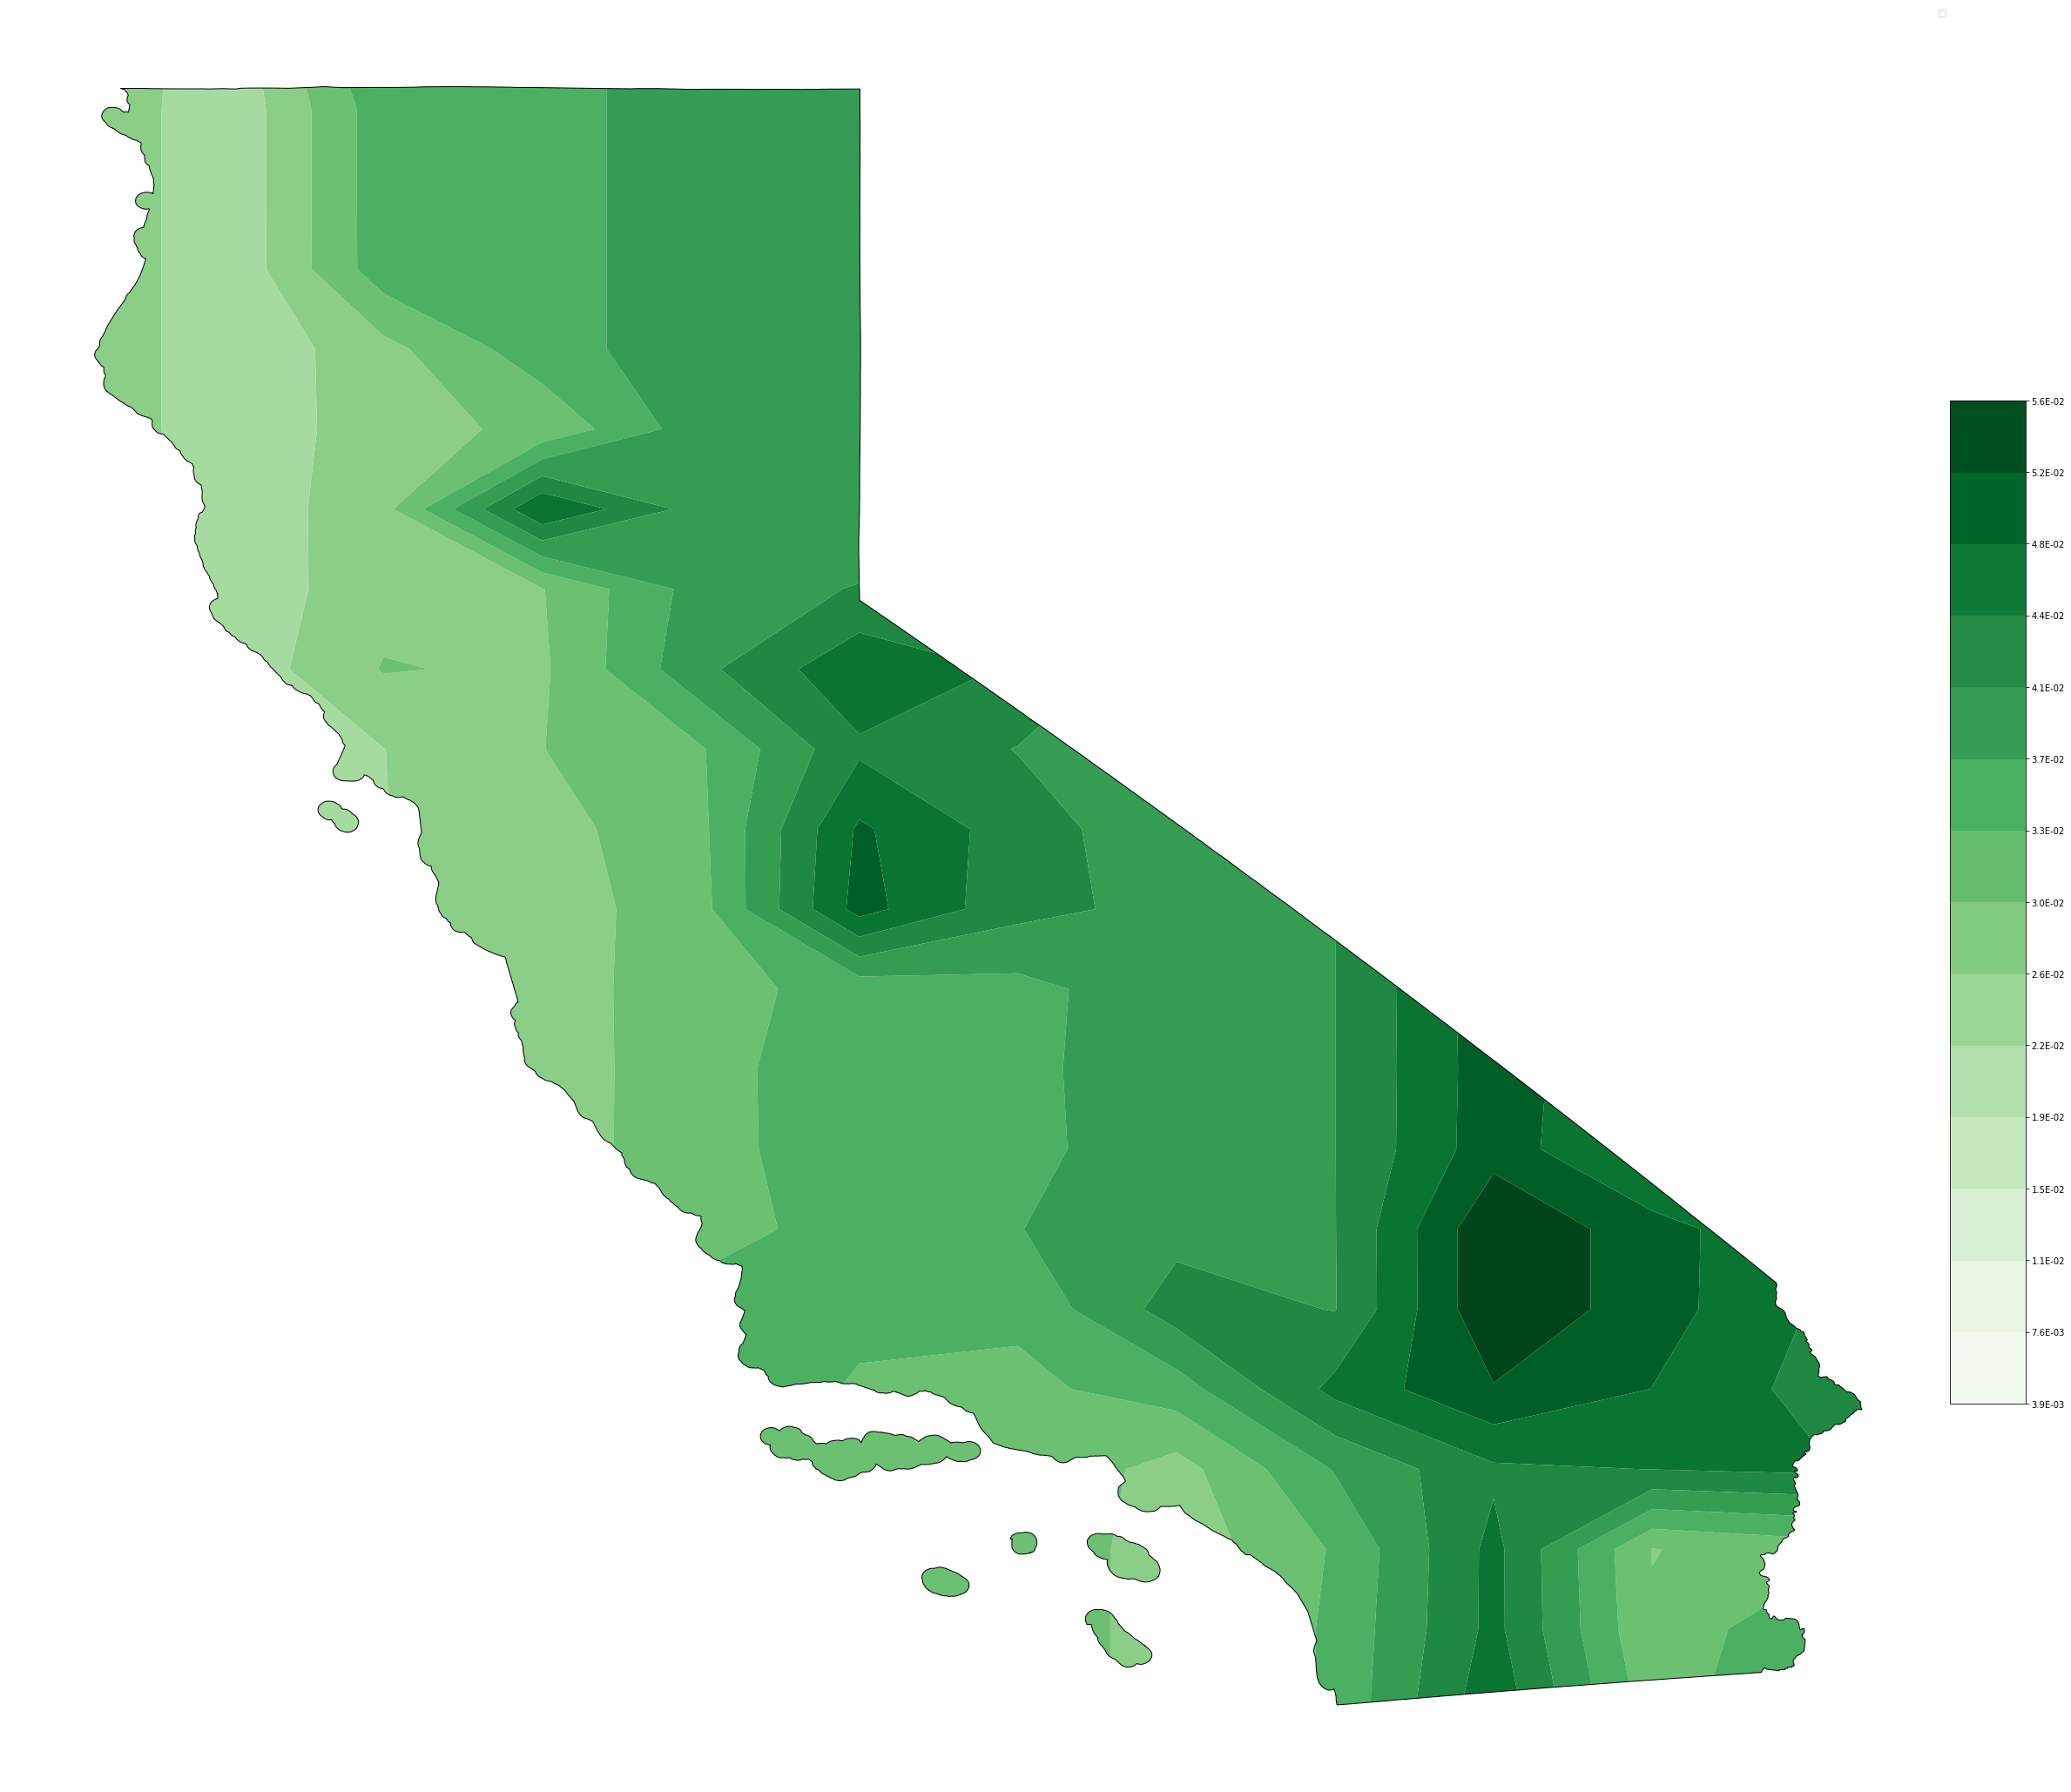

In [8]:
interpolPlot(df, shape_df, long, lat, pollutant, cmap=listedcmap)
plt.savefig("interpolPlot2.png")
plt.show()

### India
Let's have a look at pollution data in India

In [9]:
!ls "../re/India Shape"

india_ds.dbf  india_ds.shx  india_st.shp
india_ds.shp  india_st.dbf  india_st.shx


In [10]:
shapeFile = "../re/India Shape/india_st.shp"
shape_df = GeoDataFrame.from_file(shapeFile)
datafile = "../re/openaq.csv"
df = pd.read_csv(datafile)
some_value = '2019-07-31'
df = df.loc[df['local'].str.contains(some_value, regex=False)] # selecting one date

In [11]:
locations = pd.unique(df.location)
dff = []
for location in locations:
    mask = df['location'] == location
    mean = df[mask].value.mean()
    latitude = df[mask].latitude.mean()
    longitude = df[mask].longitude.mean()
    dff.append([latitude, longitude, mean])

In [12]:
df = pd.DataFrame(dff, columns=[lat, long, pollutant])
df.head()

,Latitude,Longitude,Arithmetic Mean
0,26.268249,73.019385,11.430238
1,18.501174,73.816553,6.443182
2,28.591825,77.227307,88.455357
3,28.639645,77.146263,20.150980
4,28.551201,77.273574,29.437097


/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/geopandas/base.py:38: UserWarning: GeoSeries crs mismatch: {} and {'init': 'epsg:4269'}
  warn("GeoSeries crs mismatch: {0} and {1}".format(left.crs, right.crs))
/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/geopandas/tools/sjoin.py:62: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4269'} != {})
  "(%s != %s)" % (left_df.crs, right_df.crs)


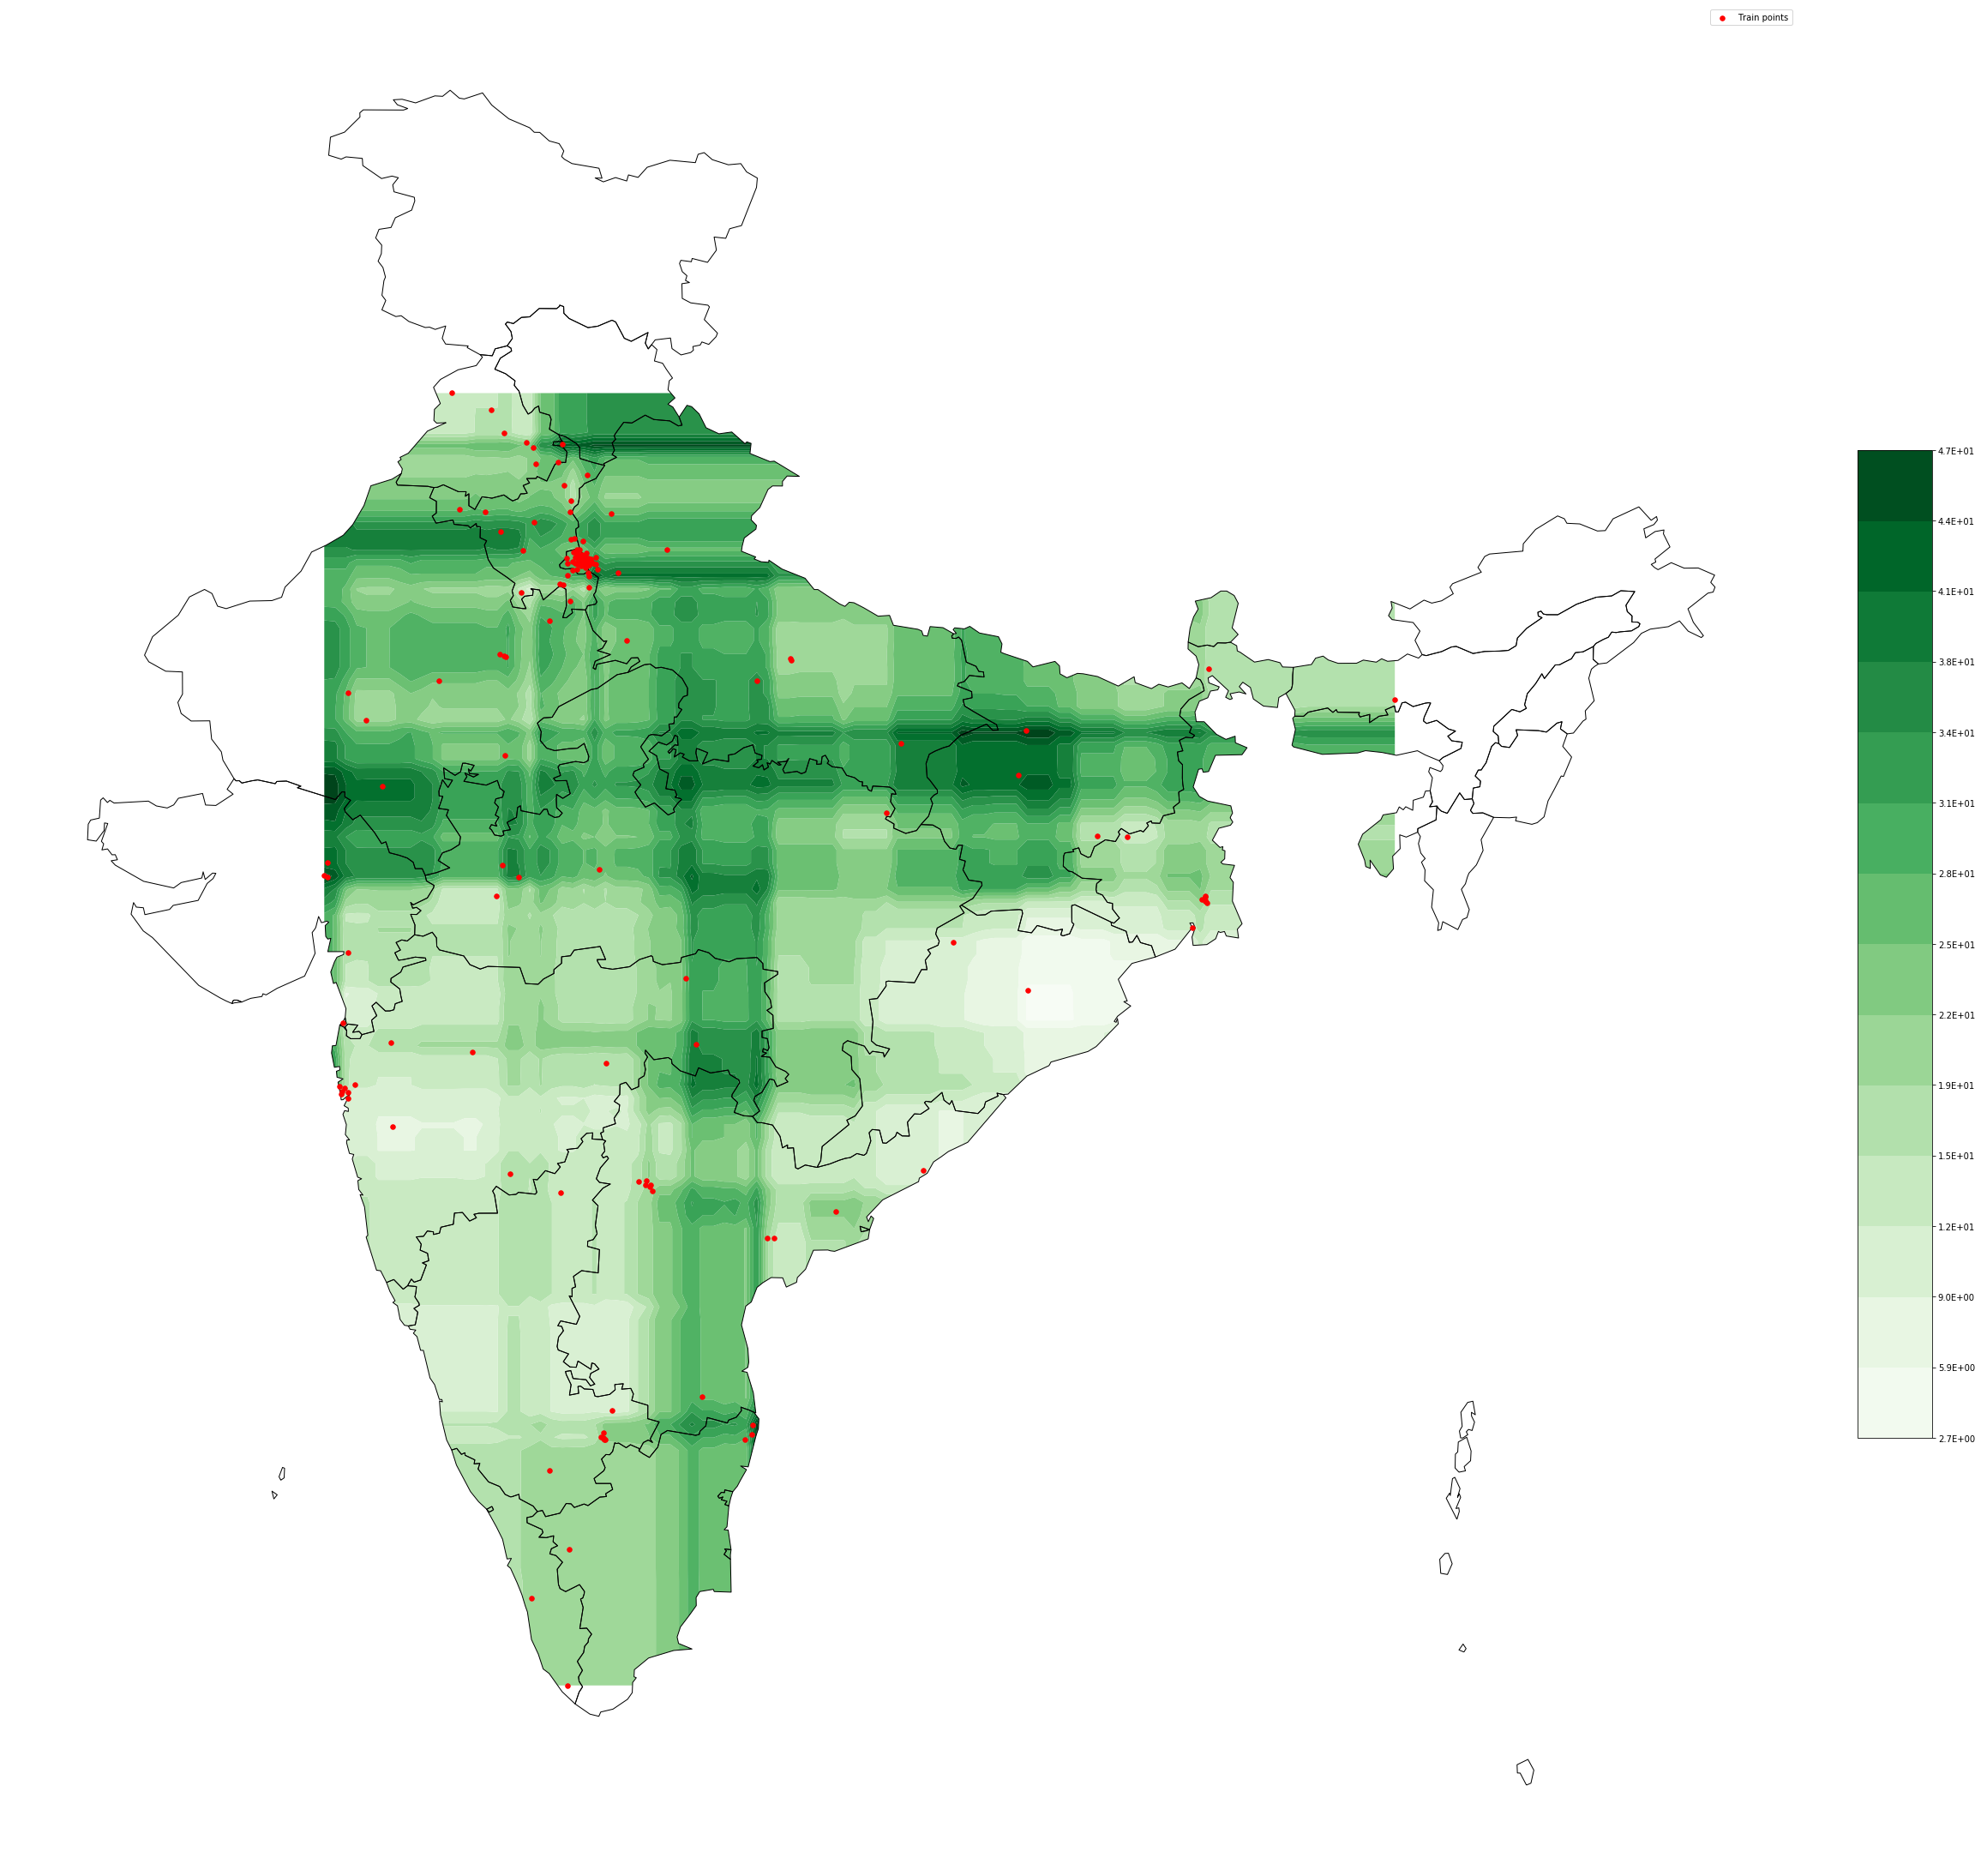

In [13]:
interpolPlot(df, shape_df, long, lat, pollutant, 
             cmap=listedcmap, plot_train_points=True,
             markersize=30)
plt.savefig("interpolPlot3.png")
plt.show()

In [14]:
import json

In [ ]:
!curl https://api.openaq.org/v1/measurements?city=Delhi > ../re/test.json
with open('../re/test.json', 'r') as f:
    data = json.load(f)

In [17]:
data

{'meta': {'name': 'openaq-api',
  'license': 'CC BY 4.0',
  'website': 'https://docs.openaq.org/',
  'page': 1,
  'limit': 100,
  'found': 349205},
 'results': [{'location': 'Pusa, Delhi - IMD',
   'parameter': 'pm25',
   'date': {'utc': '2019-08-02T12:30:00.000Z',
    'local': '2019-08-02T18:00:00+05:30'},
   'value': 65.02,
   'unit': 'µg/m³',
   'coordinates': {'latitude': 28.639645, 'longitude': 77.146263},
   'country': 'IN',
   'city': 'Delhi'},
  {'location': 'Pusa, Delhi - IMD',
   'parameter': 'pm10',
   'date': {'utc': '2019-08-02T12:30:00.000Z',
    'local': '2019-08-02T18:00:00+05:30'},
   'value': 99.31,
   'unit': 'µg/m³',
   'coordinates': {'latitude': 28.639645, 'longitude': 77.146263},
   'country': 'IN',
   'city': 'Delhi'},
  {'location': 'Pusa, Delhi - IMD',
   'parameter': 'no2',
   'date': {'utc': '2019-08-02T12:30:00.000Z',
    'local': '2019-08-02T18:00:00+05:30'},
   'value': 33.47,
   'unit': 'µg/m³',
   'coordinates': {'latitude': 28.639645, 'longitude': 77.1

In [18]:
df = pd.DataFrame(data['results'])
df.head()

,location,parameter,date,value,unit,coordinates,country,city
0,"Pusa, Delhi - IMD",pm25,"{'utc': '2019-08-02T12:30:00.000Z', 'local': '...",65.02,µg/m³,"{'latitude': 28.639645, 'longitude': 77.146263}",IN,Delhi
1,"Pusa, Delhi - IMD",pm10,"{'utc': '2019-08-02T12:30:00.000Z', 'local': '...",99.31,µg/m³,"{'latitude': 28.639645, 'longitude': 77.146263}",IN,Delhi
2,"Pusa, Delhi - IMD",no2,"{'utc': '2019-08-02T12:30:00.000Z', 'local': '...",33.47,µg/m³,"{'latitude': 28.639645, 'longitude': 77.146263}",IN,Delhi
3,"Pusa, Delhi - IMD",co,"{'utc': '2019-08-02T12:30:00.000Z', 'local': '...",800.00,µg/m³,"{'latitude': 28.639645, 'longitude': 77.146263}",IN,Delhi
4,"Pusa, Delhi - IMD",o3,"{'utc': '2019-08-02T12:30:00.000Z', 'local': '...",193.12,µg/m³,"{'latitude': 28.639645, 'longitude': 77.146263}",IN,Delhi


In [ ]:
!wget --no-check-certificate https://openaq-data.s3.amazonaws.com/2018-04-06.csv -P ../re/

--2019-08-02 18:23:30--  https://openaq-data.s3.amazonaws.com/2018-04-06.csv
Resolving openaq-data.s3.amazonaws.com (openaq-data.s3.amazonaws.com)... 52.216.114.211
Connecting to openaq-data.s3.amazonaws.com (openaq-data.s3.amazonaws.com)|52.216.114.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133839107 (128M) [text/csv]
Saving to: ‘../re/2018-04-06.csv.1’

2018-04-06.csv.1     36%[======>             ]  46.18M   475KB/s    eta 3m 28s 

In [19]:
import pandas as pd
df = pd.read_csv("/Users/nipun/Downloads/2018-04-06.csv")
df = df[(df.city=='Delhi')&(df.parameter=='pm25')].dropna().groupby("location").mean()


FileNotFoundError: [Errno 2] File b'/Users/nipun/Downloads/2018-04-06.csv' does not exist: b'/Users/nipun/Downloads/2018-04-06.csv'